## A model of acute HIV infection using R and simecol

In [1]:
library(simecol)
library(reshape2)

Loading required package: deSolve


In [2]:
acutehiv <- new("odeModel",
  main = function(time, init, parms, ...){
    with(as.list(c(init,parms)),{
    # ODEs
    N <- S+I1+I2
    dS <- lambd-beta1*c*S*I1/N-beta2*c*S*I2/N-mu*S
    dI1 <- beta1*c*S*I1/N+beta2*c*S*I2/N-alpha*I1-mu*I1
    dI2 <- alpha*I1-mu*I2-gamma*I2
    list(c(dS,dI1,dI2))
   })},
  parms = c(beta1=1./50,beta2=1./200,c=1,alpha=1./8,gamma=1./520,mu=1./(70*52),lambd=10000./(70*52)),
  times = c(from=0,to=60*52,by=1),
  init = c(S=9999,I1=1,I2=0),
  solver = "lsoda"
)

In [3]:
acutehiv <- sim(acutehiv)

In [4]:
acutehiv.out <- out(acutehiv)
acutehiv.out.long <- melt(as.data.frame(acutehiv.out),"time")

#### Visualisation

In [5]:
library(ggplot2)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

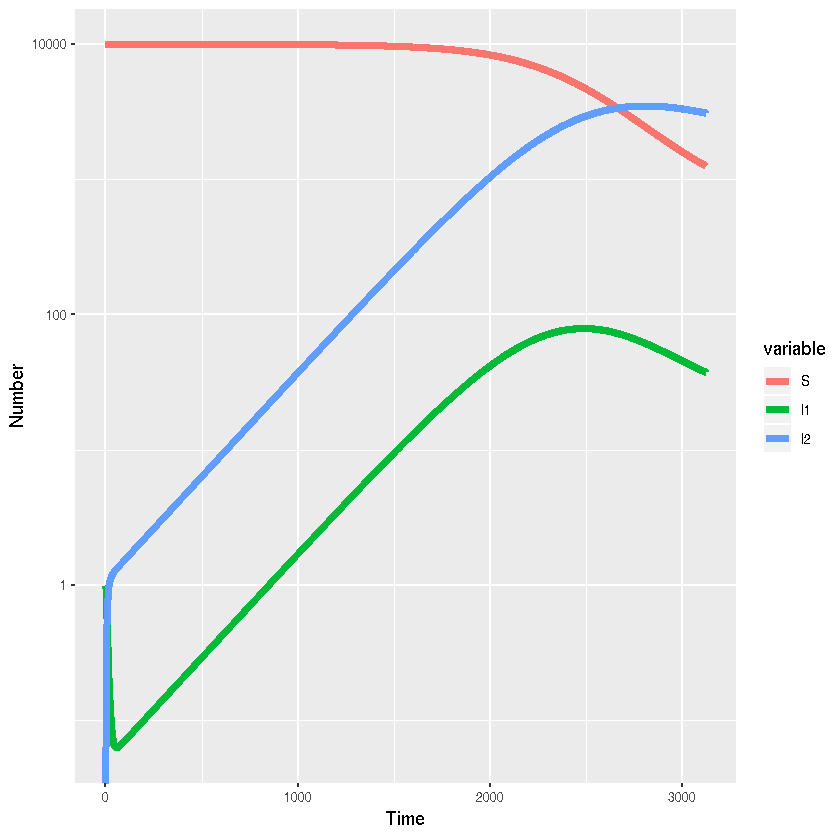

In [6]:
ggplot(acutehiv.out.long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")+
 scale_y_log10()